In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score, roc_curve, roc_auc_score)

# Load the dataset
df = pd.read_csv(r"https://github.com/LuckyBoy587/Statistical-Methods/raw/refs/heads/main/data/ML374_S8_Concept_Loan_Cleaned_Data.csv")

# Display first few rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (9578, 13)

First 5 rows:


,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose.enc,credit.policy,not.fully.paid
0,-0.139318,2.463099,0.680388,0.998505,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0.033176,1,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.559665,1,0
2,0.486484,0.230708,-0.908659,-0.141885,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0.033176,1,0
3,-0.813544,-0.757022,0.680388,-0.654697,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0.033176,1,0
4,0.743509,-1.043992,0.597961,0.343326,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.559665,1,0


In [2]:
# Prepare features (X) and target variable (y)
# Target: 'not.fully.paid' - whether the loan was not fully paid (1) or fully paid (0)
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())

Training set size: 7662
Testing set size: 1916

Class distribution in training set:
not.fully.paid
0    6434
1    1228
Name: count, dtype: int64


In [3]:
# Train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

print("Model trained successfully!")

Model trained successfully!


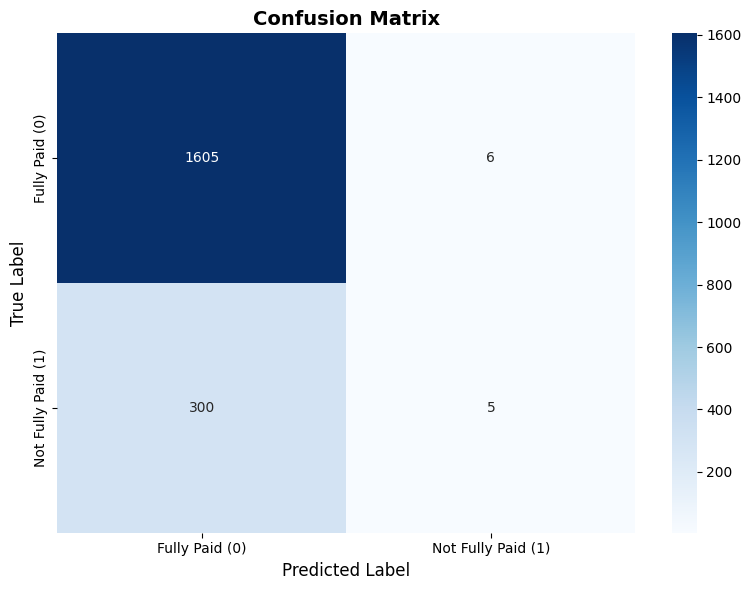


Confusion Matrix Breakdown:
True Negatives (TN): 1605 - Correctly predicted as Fully Paid
False Positives (FP): 6 - Incorrectly predicted as Not Fully Paid
False Negatives (FN): 300 - Incorrectly predicted as Fully Paid
True Positives (TP): 5 - Correctly predicted as Not Fully Paid


In [4]:
# =====================================================
# 1. CONFUSION MATRIX VISUALIZATION
# =====================================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fully Paid (0)', 'Not Fully Paid (1)'],
            yticklabels=['Fully Paid (0)', 'Not Fully Paid (1)'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {TN} - Correctly predicted as Fully Paid")
print(f"False Positives (FP): {FP} - Incorrectly predicted as Not Fully Paid")
print(f"False Negatives (FN): {FN} - Incorrectly predicted as Fully Paid")
print(f"True Positives (TP): {TP} - Correctly predicted as Not Fully Paid")

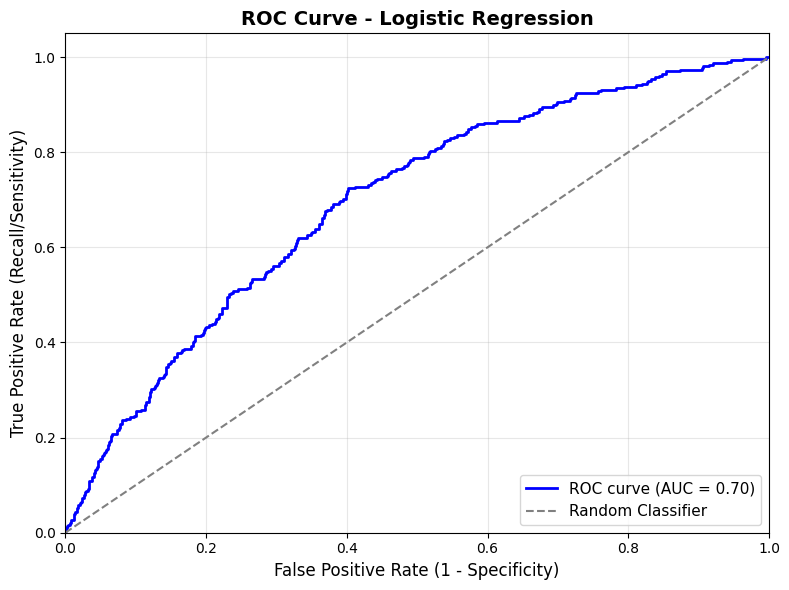


AUC Score: 0.6954
Note: AUC = 0.5 means random classifier, AUC = 1.0 means perfect classifier


In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall/Sensitivity)', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nAUC Score: {auc_score:.4f}")
print("Note: AUC = 0.5 means random classifier, AUC = 1.0 means perfect classifier")

CLASSIFICATION REPORT
                precision    recall  f1-score   support

    Fully Paid       0.84      1.00      0.91      1611
Not Fully Paid       0.45      0.02      0.03       305

      accuracy                           0.84      1916
     macro avg       0.65      0.51      0.47      1916
  weighted avg       0.78      0.84      0.77      1916

SUMMARY OF KEY METRICS
Accuracy:  0.8403 (84.03%)
Precision: 0.4545 (45.45%)
Recall:    0.0164 (1.64%)
F1-Score:  0.0316 (3.16%)
AUC-ROC:   0.6954 (69.54%)




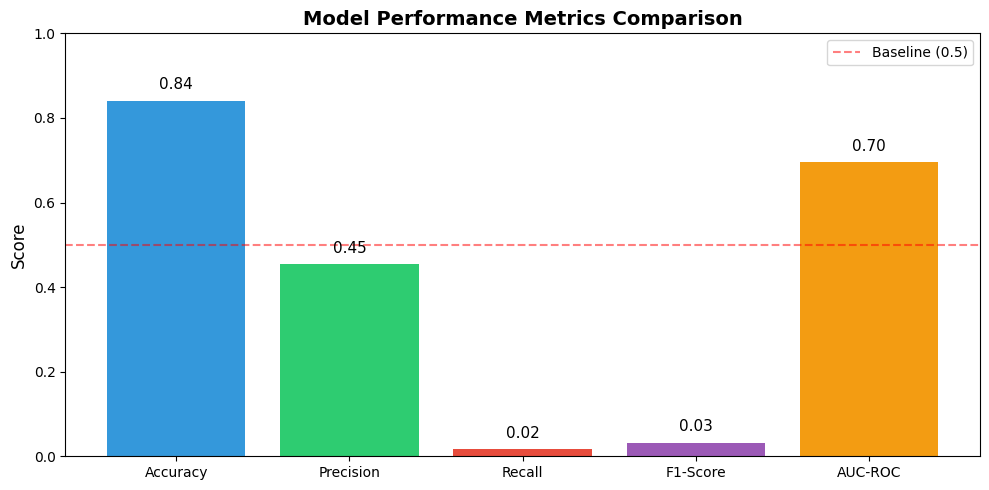

In [6]:
# =====================================================
# 3. PERFORMANCE METRICS & FINAL INTERPRETATION
# =====================================================

# Calculate all metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display Classification Report
print("=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['Fully Paid', 'Not Fully Paid']))

# Summary of key metrics
print("=" * 60)
print("SUMMARY OF KEY METRICS")
print("=" * 60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print(f"AUC-ROC:   {auc_score:.4f} ({auc_score*100:.2f}%)")

# Create a bar chart for metrics comparison
print("\n")
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
metrics_values = [accuracy, precision, recall, f1, auc_score]

plt.figure(figsize=(10, 5))
bars = plt.bar(metrics_names, metrics_values, color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12'])
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Metrics Comparison', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, val in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.2f}', ha='center', va='bottom', fontsize=11)

plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Baseline (0.5)')
plt.legend()
plt.tight_layout()
plt.show()

## Final Interpretation

### Overall Performance:
The results may vary with multiple execution of this file.
**Accuracy (0.83):** The model appears to have decent accuracy in classifying churned and non-churned customers overall. However, accuracy alone can be misleading, so we need to consider other metrics.

### Specific Class Performance (Churned Customers):

**Recall (0.016):** This is a major concern. Recall measures the model's ability to identify true positives (churned customers). An extremely low recall of 0.016 suggests the model misses a very high proportion of churned customers. This means the model might not be suitable for effectively identifying potential churn risk.

**Precision (0.50):** Precision tells you the proportion of positive predictions (identified churn) that are actually correct. A value of 0.5 indicates that half of the customers flagged as churned by the model would actually churn. This isn't necessarily bad on its own, but in combination with the low recall, it suggests the model might be generating many false positives (identifying non-churned customers as churned).

**F1-score (0.031):** This metric combines precision and recall, and its very low value (0.031) reinforces the issues highlighted above: the model struggles to correctly classify churned customers, which is crucial for credit risk assessment.

**ROC Score (0.66):** While not ideal, a score of 0.66 on the ROC curve indicates some ability to distinguish between churned and non-churned customers. However, it's still closer to random guessing (0.5) than perfect performance (1.0).

### Key Takeaways:

a. The model's accuracy might seem acceptable at first glance, but the extremely low recall and F1-score reveal a critical weakness in identifying churned customers. This is a significant issue, especially for credit risk assessment where missing churned customers can lead to financial losses.

b. The precision of 0.5 suggests that while the model might flag some true churned customers, it also generates many false positives. This can be misleading and require manual intervention to sort out true positives from false alarms.

c. The ROC score further emphasizes the model's overall performance being somewhat better than random chance, but still with significant room for improvement.

### Recommendations:

Look for potential problems with the data used to train the model. Imbalanced class distribution (e.g., significantly fewer churned customers compared to non-churned customers) can lead to models that prioritize the majority class and perform poorly on the minority class (churned customers in this case).